In [115]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from random import choice
from utils import *

In [109]:
DATADIR = os.path.join("data", "clean")

x_train = pd.read_pickle(os.path.join(DATADIR, "clean_x_train.pkl"))
x_test = pd.read_pickle(os.path.join(DATADIR, "clean_x_test.pkl"))
y_train = pd.read_pickle(os.path.join(DATADIR, "clean_y_train.pkl"))
y_test = pd.read_pickle(os.path.join(DATADIR, "clean_y_test.pkl"))

with open(os.path.join(DATADIR, "posterior_samples.pkl"), "rb") as infile:
    posterior_samples = pickle.load(infile)

with open(os.path.join(DATADIR, "prior_samples.pkl"), "rb") as infile:
    prior_samples = pickle.load(infile)

with open(os.path.join(DATADIR, "posterior_samples_fitted.pkl"), "rb") as infile:
    fitted_samples = pickle.load(infile)

with open(os.path.join(DATADIR, "posterior_predict_samples.pkl"), "rb") as infile:
    predicted_samples = pickle.load(infile)

dim0_label = "Cholesterol"
dim1_label = "MaxHR"

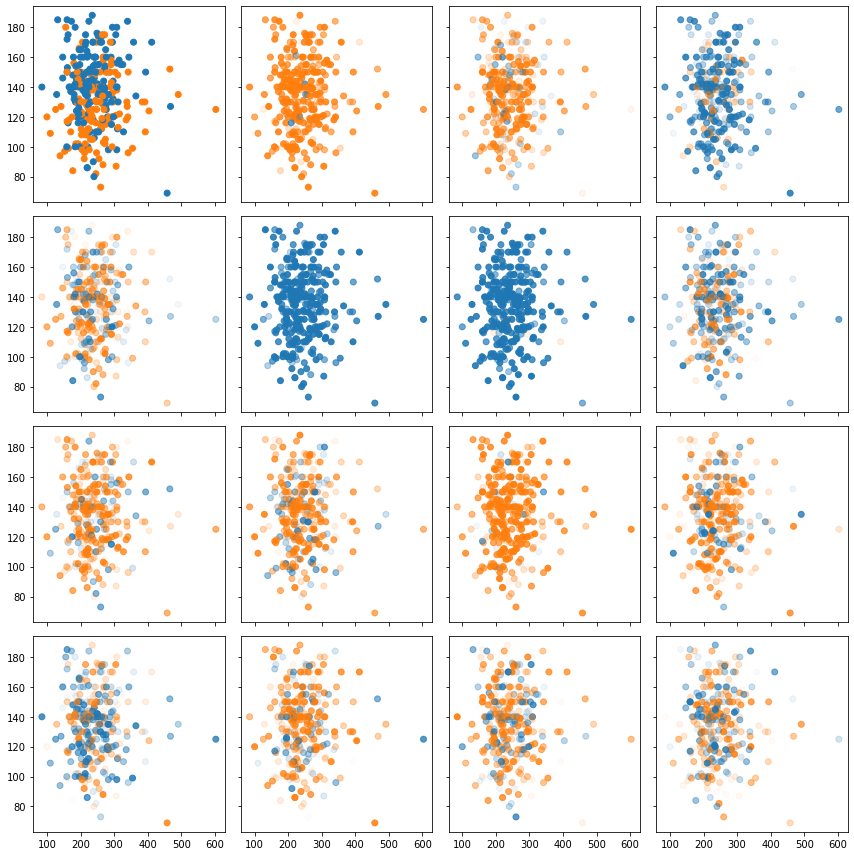

In [104]:
prior_comparison = compare_samples_with_original(x_train, y_train, prior_samples, plot_proba = True)

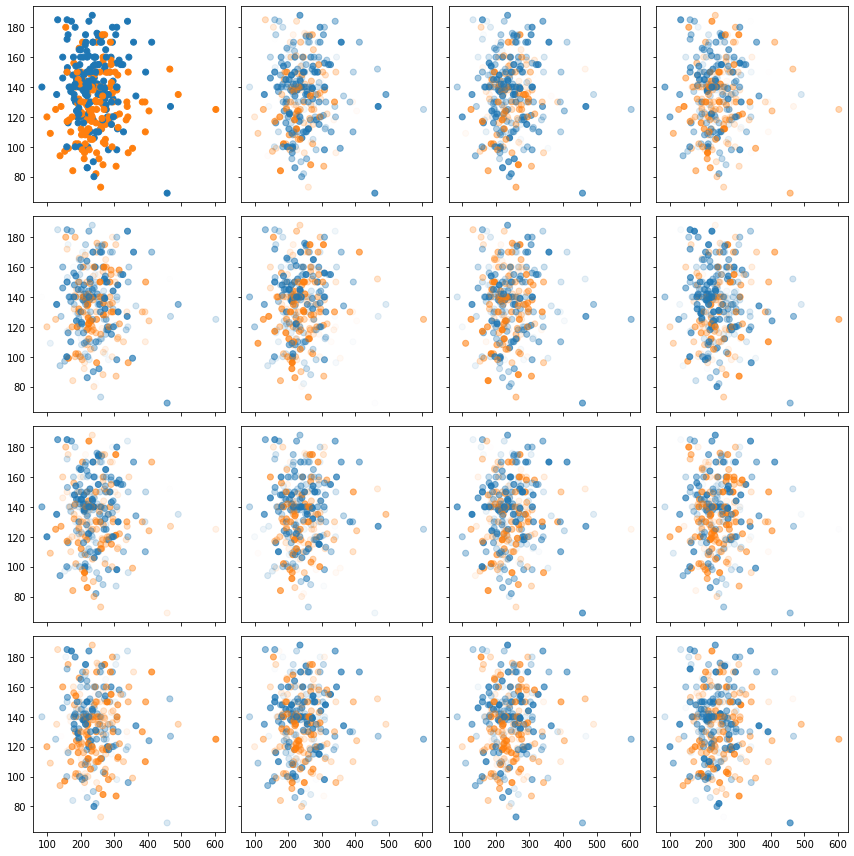

In [106]:
posterior_comparison = compare_samples_with_original(x_train, y_train, posterior_samples, plot_proba = True)

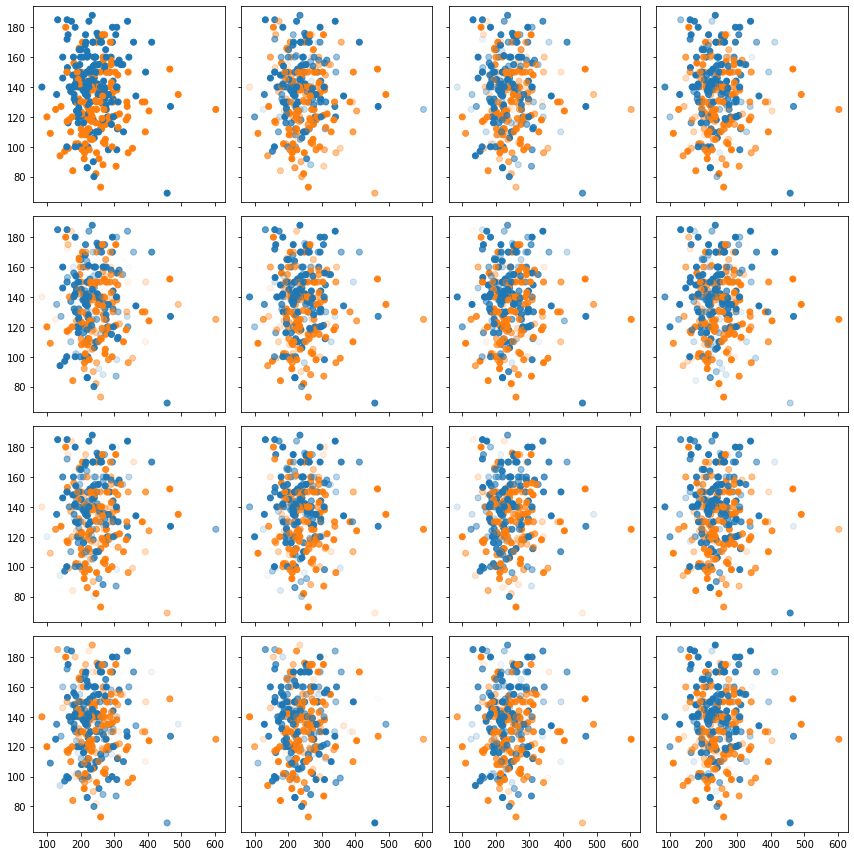

In [110]:
fitted_comparison = compare_samples_with_original(x_train, y_train, fitted_samples, plot_proba=True)

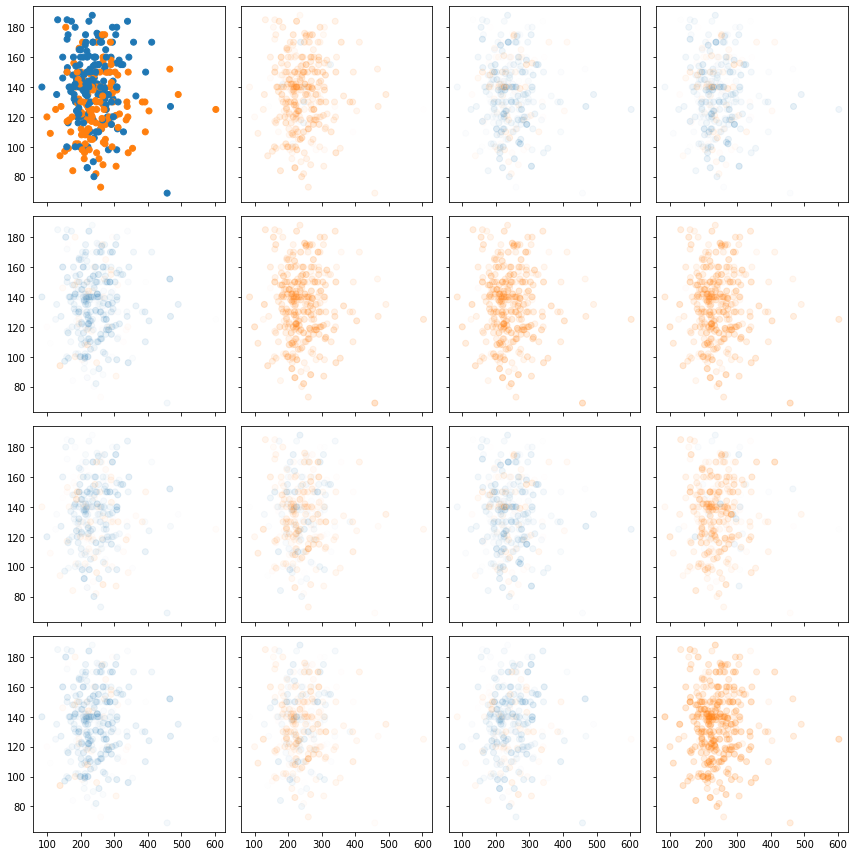

In [63]:
prior_mean_fig = plot_mean_samples(prior_samples)

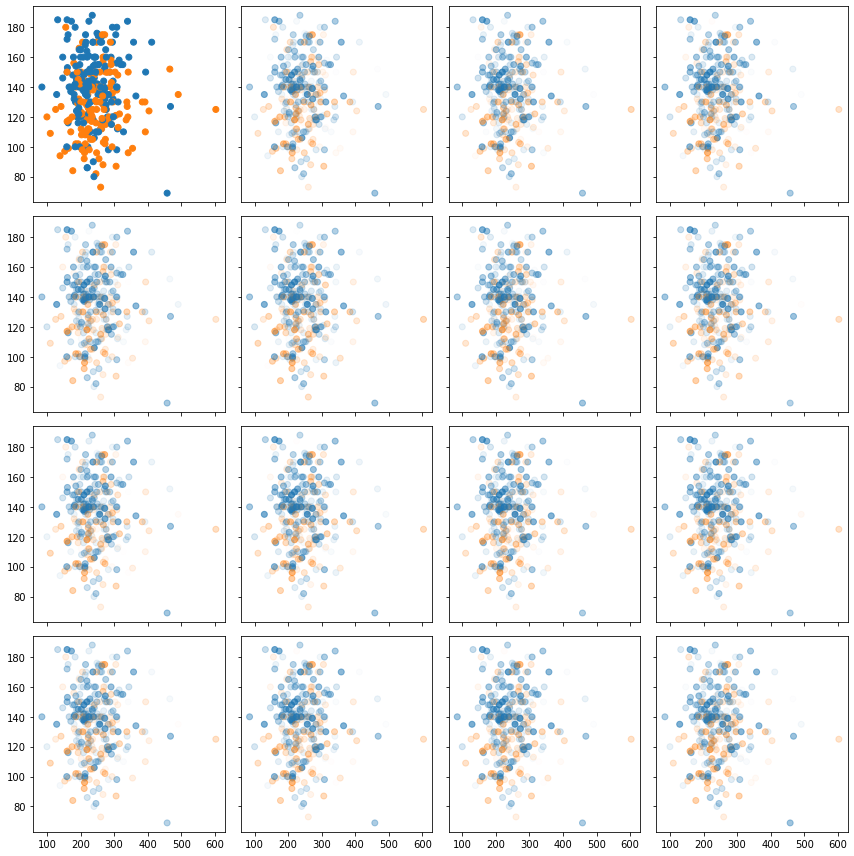

In [107]:
posterior_mean_fig = plot_mean_samples(posterior_samples, plot_proba=True)

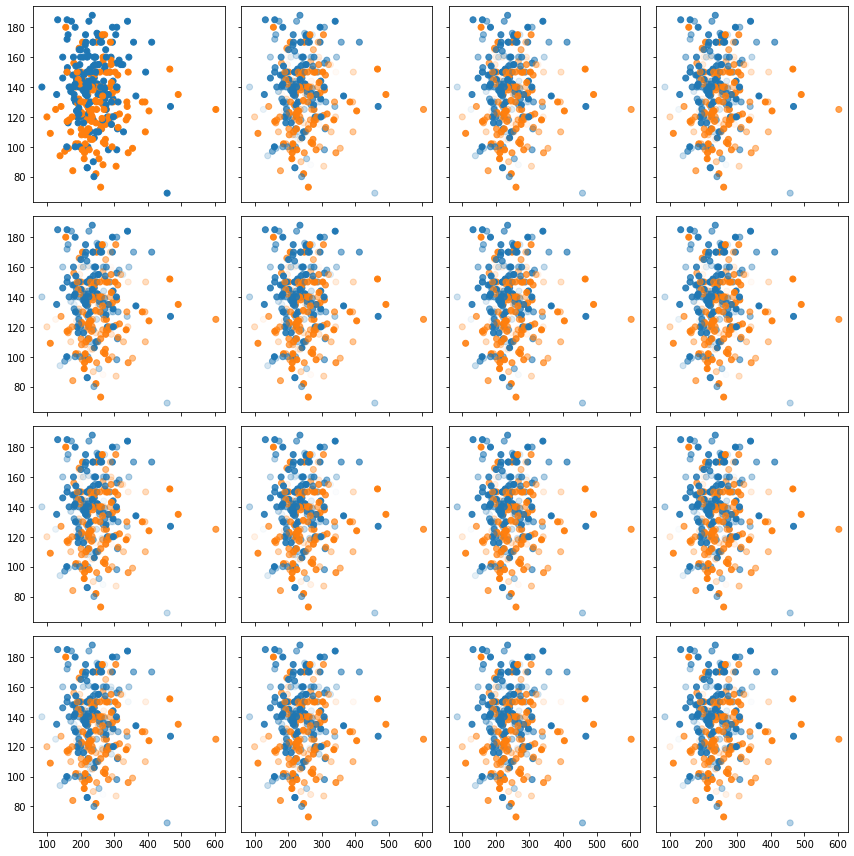

In [111]:
fitted_mean_fig = plot_mean_samples(fitted_samples)

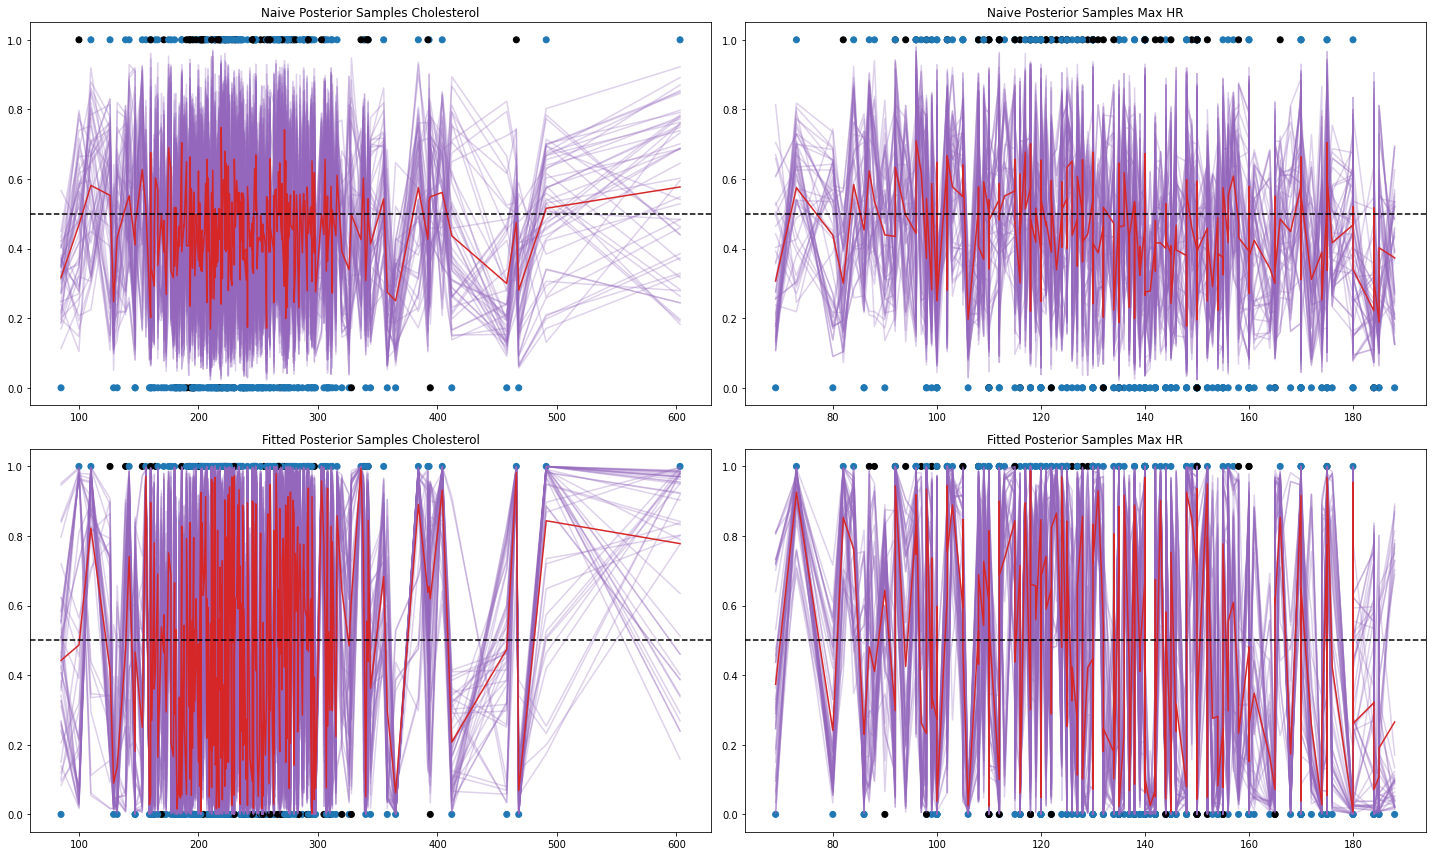

In [119]:
titles = [" ".join(strings) for strings in itertools.product(["Naive Posterior Samples", "Fitted Posterior Samples"], ["Cholesterol", "Max HR"])]
fig, axs = plt.subplots(2, 2, figsize=(20, 12), tight_layout=True)
for (sample, dim), title, ax in zip(itertools.product([posterior_samples, fitted_samples], [0, 1]), titles, axs.ravel()):
    plot_1d(dim, x_train, y_train, sample, ax, title=title)
    